<H2> IBM Applied Data Science Capstone </H2>

<H1>Best Stationary Shop Locations</H1>

<p>Project by: <b>PRASFUR TIWARI</b></p>

<H2>Introduction</H2>

<p>Seeing the current scenario of India, there are numerous schools; nearly one in every street, incrementing the number of students. As we all would be familiar with the fact that there is a lot of homework and project work allotted to the students during school. To gain utter perfection in their work, the students require several stationary stuffs like pen, pencils, charts, project files, etc. This makes the business of a stationary shop much favorable to flourish and prosper.
    
Taking the school students as the target audience, this project aims to find the schools around a given location so that a business person, aiming to start a stationary shop, can receive help to pursue a profitable business.
</p>

<H2>Business Problem </H2>
<p> For a business person to run a stationary shop business, it will be utterly problematic for his business to acquire profits if he sets his shop in a location where no students or schools are present. Hence, this project aims to colect data about a particular location where many schools are located, so that his shop can attract more and more students. </p>

<p>This idea can solve the problems faced by students and make the business profitable as students need a lot of stationary stuff to complete their homework as well as projects.
 </p>

<H2>Data</H2>
<p>The data used will be the location of schools that will be acquired using the <b>Foursquare</b> website. Through the website, coordinates of schools in a particular location will be generated and processed. Then based on clustering, the business person will be delivered with the best location for his shop to be set up.</p>

<h3>Importing libraries</h3>

In [1]:
import requests as rq
import pandas as pd
import numpy as np
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
import folium 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

<h3>Foursquare Credentials</h3>

In [34]:
ID='****************************'
SECRET='****************************'
Version='20180604'
Limit=120

<h3> Getting Coordinates </h3>
<p> This project aims to find the schools in <b>Kanpur</b>, Uttar Pradesh.</p>

In [3]:
address='Kanpur, Uttar Pradesh'
geolocator=Nominatim(user_agent='foursquare_agent')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print(latitude,longitude)

26.4609135 80.3217588


<h2>Data Gathering</h2>
<p>The data regarding schools of Kanpur is acquired from the Foursquare website by sending the request.</p> 

In [4]:
searching='Schools'
radius=3000
url='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(ID,SECRET,Version,latitude,longitude,radius,Limit)
results=rq.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '5eb3b6dced78b8001b251e19'}, 'response': {'venues': [{'id': '4c53c90ab3b09c74cc1b1eb4', 'name': 'Gumti No. 5', 'location': {'address': 'Gumti', 'lat': 26.467595541007164, 'lng': 80.31269020223081, 'labeledLatLngs': [{'label': 'display', 'lat': 26.467595541007164, 'lng': 80.31269020223081}], 'distance': 1170, 'cc': 'IN', 'city': 'Kānpur', 'state': 'Uttar Pradesh', 'country': 'India', 'formattedAddress': ['Gumti', 'Kānpur', 'Uttar Pradesh', 'India']}, 'categories': [{'id': '4bf58dd8d48988d12b951735', 'name': 'Bus Line', 'pluralName': 'Bus Lines', 'shortName': 'Bus', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1588836227', 'hasPerk': False}, {'id': '5303a0cb11d2eac30b61e9c6', 'name': 'HDFC Bank', 'location': {'address': '110 / 189, R. K. Nagar G. T. Road', 'lat': 26.468362, 'lng': 80.317648, 'labeledLatLngs': [{'label': 'display', 'lat': 26.468362, 'lng': 80.31764

<H1>Data Preprocessing and Wrangling</H1>

<H2>Data Normalization</H2>
<p>The collected data is normalized to make it suitable for model fitting. </p>

In [5]:
venues=results['response']['venues']
df=json_normalize(venues)
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode,location.crossStreet
0,4c53c90ab3b09c74cc1b1eb4,Gumti No. 5,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",v-1588836227,False,Gumti,26.467596,80.312690,"[{'label': 'display', 'lat': 26.46759554100716...",1170,IN,Kānpur,Uttar Pradesh,India,"[Gumti, Kānpur, Uttar Pradesh, India]",NaN,NaN
1,5303a0cb11d2eac30b61e9c6,HDFC Bank,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",v-1588836227,False,"110 / 189, R. K. Nagar G. T. Road",26.468362,80.317648,"[{'label': 'display', 'lat': 26.468362, 'lng':...",924,IN,Kānpur,Uttar Pradesh,India,"[110 / 189, R. K. Nagar G. T. Road, Kānpur, Ut...",NaN,NaN
2,501ff6e3f470fc90bfb4f394,Fastrack Store,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",v-1588836227,False,"Ground Floor ,Next To Wot, Z Square Mall",26.463888,80.332890,"[{'label': 'display', 'lat': 26.463888, 'lng':...",1157,IN,Kānpur,Uttar Pradesh,India,"[Ground Floor ,Next To Wot, Z Square Mall, Kān...",208001,NaN
3,4e4287276365c15e6fa844e6,Reliance Digital,"[{'id': '4bf58dd8d48988d122951735', 'name': 'E...",v-1588836227,False,"Z-square Mall - Property NO 16/113, The Mall",26.458471,80.319865,"[{'label': 'display', 'lat': 26.45847126867119...",330,IN,Kānpur,Uttar Pradesh,India,"[Z-square Mall - Property NO 16/113, The Mall ...",208001,MG Road
4,5303a0c711d2eac30b617dc0,HDFC Bank,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",v-1588836227,False,"124/248, C Blk",26.451347,80.309307,"[{'label': 'display', 'lat': 26.451347, 'lng':...",1635,IN,Kanpur Nagar,Uttar Pradesh,India,"[124/248, C Blk (Govind Nagar), Kanpur Nagar 2...",208006,Govind Nagar


<H2>Data Filtering</H2>
<p>We filter the data by arranging it in a more readable format.</p>

In [6]:
filter=['name','categories']+[col for col in df.columns if col.startswith('location')]+['id']
df_filter=df.loc[:,filter]
def category(row):
    try:
        category_list=row['categories']
    except:
        category_list=row['venue.categories']
    if len(category_list)==0:
        return None
    else:
        return category_list[0]['name']
df_filter['categories']=df_filter.apply(category,axis=1)
df_filter.columns=[column.split('.')[-1] for column in df_filter.columns]
df_names=df_filter['name']
df_filter

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,crossStreet,id
0,Gumti No. 5,Bus Line,Gumti,26.467596,80.312690,"[{'label': 'display', 'lat': 26.46759554100716...",1170,IN,Kānpur,Uttar Pradesh,India,"[Gumti, Kānpur, Uttar Pradesh, India]",NaN,NaN,4c53c90ab3b09c74cc1b1eb4
1,HDFC Bank,Bank,"110 / 189, R. K. Nagar G. T. Road",26.468362,80.317648,"[{'label': 'display', 'lat': 26.468362, 'lng':...",924,IN,Kānpur,Uttar Pradesh,India,"[110 / 189, R. K. Nagar G. T. Road, Kānpur, Ut...",NaN,NaN,5303a0cb11d2eac30b61e9c6
2,Fastrack Store,Clothing Store,"Ground Floor ,Next To Wot, Z Square Mall",26.463888,80.332890,"[{'label': 'display', 'lat': 26.463888, 'lng':...",1157,IN,Kānpur,Uttar Pradesh,India,"[Ground Floor ,Next To Wot, Z Square Mall, Kān...",208001,NaN,501ff6e3f470fc90bfb4f394
3,Reliance Digital,Electronics Store,"Z-square Mall - Property NO 16/113, The Mall",26.458471,80.319865,"[{'label': 'display', 'lat': 26.45847126867119...",330,IN,Kānpur,Uttar Pradesh,India,"[Z-square Mall - Property NO 16/113, The Mall ...",208001,MG Road,4e4287276365c15e6fa844e6
4,HDFC Bank,Bank,"124/248, C Blk",26.451347,80.309307,"[{'label': 'display', 'lat': 26.451347, 'lng':...",1635,IN,Kanpur Nagar,Uttar Pradesh,India,"[124/248, C Blk (Govind Nagar), Kanpur Nagar 2...",208006,Govind Nagar,5303a0c711d2eac30b617dc0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Rainbow The Restaurant,Indian Restaurant,Celebration Crossing,26.469643,80.316666,"[{'label': 'display', 'lat': 26.469643, 'lng':...",1096,IN,Kānpur,Uttar Pradesh,India,"[Celebration Crossing (Near Gumti Gurudwara), ...",NaN,Near Gumti Gurudwara,57530a26498e368996eca9e3
115,Bihari Iron Store,Construction & Landscaping,NaN,26.465321,80.310825,"[{'label': 'display', 'lat': 26.465321, 'lng':...",1194,IN,NaN,NaN,India,[India],NaN,NaN,56dbddad498e4a7228bf7f4b
116,Asian Public School,School,NaN,26.468912,80.336395,"[{'label': 'display', 'lat': 26.468912, 'lng':...",1708,IN,NaN,NaN,India,[India],NaN,NaN,4f97e5ffe4b086d0d5ce90a8
117,Sanatan Dharm Mandir,Temple,NaN,26.470117,80.311771,"[{'label': 'display', 'lat': 26.470117, 'lng':...",1428,IN,NaN,NaN,India,[India],NaN,NaN,569cb9fd498ec37b30b64686


<H2>Checking for null values</H2>
<P>Here, we check for any Null, None or NaN values which are to be removed as they are unusable.</P>

In [7]:
df_filter.isnull().sum()

name                  0
categories            8
address              67
lat                   0
lng                   0
labeledLatLngs        0
distance              0
cc                    0
city                 54
state                53
country               0
formattedAddress      0
postalCode           87
crossStreet         101
id                    0
dtype: int64

<H3>Null values using Heatmap</H3>
<P>Here, we generate a heatmap so as to get information regarding null values, graphically.</P>

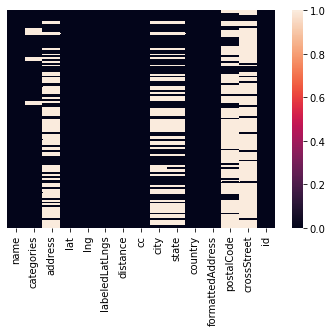

In [8]:
import seaborn as sns
sns.heatmap(df_filter.isnull(),yticklabels=False)

<H2>Data Cleaning</H2>
<p>Here, we remove the unwanted or unusable rows having null values.</p>

In [9]:
df_filter.drop(columns={'categories','address','city','crossStreet','postalCode','state'},inplace=True)
df_filter.head()

,name,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,id
0,Gumti No. 5,26.467596,80.312690,"[{'label': 'display', 'lat': 26.46759554100716...",1170,IN,India,"[Gumti, Kānpur, Uttar Pradesh, India]",4c53c90ab3b09c74cc1b1eb4
1,HDFC Bank,26.468362,80.317648,"[{'label': 'display', 'lat': 26.468362, 'lng':...",924,IN,India,"[110 / 189, R. K. Nagar G. T. Road, Kānpur, Ut...",5303a0cb11d2eac30b61e9c6
2,Fastrack Store,26.463888,80.332890,"[{'label': 'display', 'lat': 26.463888, 'lng':...",1157,IN,India,"[Ground Floor ,Next To Wot, Z Square Mall, Kān...",501ff6e3f470fc90bfb4f394
3,Reliance Digital,26.458471,80.319865,"[{'label': 'display', 'lat': 26.45847126867119...",330,IN,India,"[Z-square Mall - Property NO 16/113, The Mall ...",4e4287276365c15e6fa844e6
4,HDFC Bank,26.451347,80.309307,"[{'label': 'display', 'lat': 26.451347, 'lng':...",1635,IN,India,"[124/248, C Blk (Govind Nagar), Kanpur Nagar 2...",5303a0c711d2eac30b617dc0


<H4>Ensuring the removal of null values</H4>

In [10]:
df_filter.isnull().sum()

name                0
lat                 0
lng                 0
labeledLatLngs      0
distance            0
cc                  0
country             0
formattedAddress    0
id                  0
dtype: int64

<h4>Heatmap to ensure cleaned data</h4>

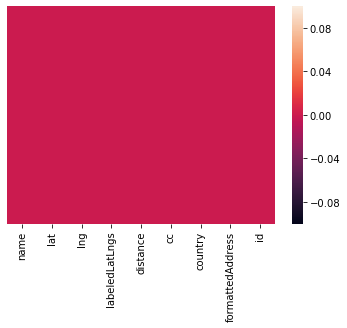

In [11]:
sns.heatmap(df_filter.isnull(),yticklabels=False)

<H4>Removing remaining unusable columns</H4> 

In [12]:
df_filter.drop(columns={'name','cc','country','formattedAddress','labeledLatLngs','id'},inplace=True)

<H2>Data Preprocessing and Standardization</H2>
<p>We start the use of scikit-learn module so as to fit the model.</p>

In [13]:
from sklearn.preprocessing import StandardScaler
Clus_dataset=StandardScaler().fit_transform(df_filter)
Clus_dataset

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.82301382e-01, -6.03723211e-01, -2.39196794e-01],
       [ 2.97747002e-01,  9.19201179e-04, -8.65179892e-01],
       [-3.76136025e-01,  1.85980092e+00, -2.72277201e-01],
       [-1.19201517e+00,  2.71269279e-01, -2.37670006e+00],
       [-2.26508709e+00, -1.01633132e+00,  9.44063941e-01],
       [-3.55822226e-01, -1.76226059e-01, -1.55477916e+00],
       [-1.64505825e-02,  2.74470684e-01, -1.62602927e+00],
       [-2.00819806e+00, -1.02050641e+00,  6.53974212e-01],
       [-3.30541050e-01,  1.89089637e+00, -1.85759212e-01],
       [ 9.27520123e-01, -4.08643364e-01,  5.82724104e-01],
       [ 3.15601245e-01, -5.67160913e-01, -1.29776984e-01],
       [ 7.91224833e-02, -8.66472564e-02, -1.12473386e+00],
       [-2.01264454e+00, -1.06023615e+00,  7.25224321e-01],
       [ 9.77224579e-01, -1.50533202e-01,  4.32589946e-01],
       [-2.26508709e+00, -1.01633132e+00,  9.44063941e-01],
       [ 1.90322737e+00,  4.59358801e-01,  1.91357435e+00],
       [-1.11102098e+00,  3.73378509e-01

<H1>Clustering</H1>

<H3>Applying K-Means Clustering</H3>
<p>We start with the clustering process of our dataset using the k-means algorithm. Since we aim to make 4 clusters, we take 'k' as 4.</p>

In [14]:
from sklearn.cluster import KMeans
k=4
kmeans=KMeans(n_clusters=k, random_state=0).fit(Clus_dataset)

<h4>Getting the labels for each row generated

In [15]:
kmeans.labels_

array([3, 2, 1, 2, 0, 2, 2, 0, 1, 3, 3, 2, 0, 3, 0, 3, 2, 3, 3, 0, 0, 2,
       3, 3, 1, 2, 3, 0, 2, 2, 2, 3, 3, 3, 1, 1, 0, 0, 2, 2, 3, 3, 3, 3,
       2, 1, 0, 3, 2, 0, 2, 0, 3, 0, 1, 0, 1, 2, 3, 3, 1, 3, 3, 0, 0, 3,
       3, 3, 2, 1, 1, 2, 3, 3, 0, 0, 1, 2, 3, 0, 3, 2, 1, 0, 2, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 2, 2, 3, 0, 3, 0, 1, 0,
       0, 3, 2, 3, 3, 0, 1, 3, 3], dtype=int32)

<h3>Concatenating datasets with their respected labels.</h3> 

In [16]:
labels=kmeans.labels_
df_filter['Labels']=labels
df_filter.head()

,lat,lng,distance,Labels
0,26.467596,80.312690,1170,3
1,26.468362,80.317648,924,2
2,26.463888,80.332890,1157,1
3,26.458471,80.319865,330,2
4,26.451347,80.309307,1635,0


<H2>Color Codes</H2>
<p>Here, we assign a color to each label.</p>

In [17]:
y=0
ColorCode=[]
for x in df_filter['Labels']:
    if x==0:
        ColorCode.append('Red')
    elif x==1:
        ColorCode.append('Yellow')
    elif x==2:
        ColorCode.append('Blue')
    elif x==3:
        ColorCode.append('Green')

<H1>Data Visualization</H1>

<H2>Visualizing each cluster</H2>
<p>Here, we map all the schools pf our dataset along with suitable colors so as to differentiate between the clusters.</p>

In [35]:
%matplotlib inline
knpmap=folium.Map(location=[df_filter['lat'].mean(), df_filter['lng'].mean()], zoom_start=14)
i=0
Kanpur=folium.map.FeatureGroup()
for lat, lon in zip(df_filter['lat'], df_filter['lng']):
    Kanpur.add_child(folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        color=ColorCode[i],
        fill=True,
        fill_color=ColorCode[i],
        fill_opacity=0.7))
    i=i+1
knpmap.add_child(Kanpur)
knpmap

<h2>Cluster 1 Data</h2>

In [26]:
cluster1=df_filter.loc[df_filter['Labels']==0,df_filter.columns[[1]+[0]+list(range(5, df_filter.shape[1]))]]
cluster1

,lng,lat
4,80.309307,26.451347
7,80.309273,26.453053
12,80.308947,26.453023
14,80.309307,26.451347
19,80.308620,26.452600
20,80.308238,26.449311
27,80.308691,26.463246
36,80.305448,26.462403
37,80.311296,26.464351
46,80.309064,26.464339


<h2>Cluster 2 Data</h2>

In [27]:
cluster2=df_filter.loc[df_filter['Labels']==1,df_filter.columns[[1]+[0]+list(range(5, df_filter.shape[1]))]]
cluster2

,lng,lat
2,80.332890,26.463888
8,80.333145,26.464191
24,80.338916,26.463037
34,80.335422,26.466548
35,80.330740,26.467567
45,80.329468,26.468386
54,80.331871,26.449923
56,80.338780,26.463239
60,80.331871,26.449923
69,80.339112,26.461877


<h2>Cluster 3 Data</h2>

In [28]:
cluster3=df_filter.loc[df_filter['Labels']==2,df_filter.columns[[1]+[0]+list(range(5, df_filter.shape[1]))]]
cluster3

,lng,lat
1,80.317648,26.468362
3,80.319865,26.458471
5,80.316195,26.464023
6,80.319891,26.466276
11,80.316930,26.466911
16,80.320702,26.459009
21,80.313411,26.466150
25,80.319736,26.462986
28,80.314279,26.457633
29,80.324751,26.465788


<h2>Cluster 4 Data</h2>

In [29]:
cluster4=df_filter.loc[df_filter['Labels']==3,df_filter.columns[[1]+[0]+list(range(5, df_filter.shape[1]))]]
cluster4

,lng,lat
0,80.312690,26.467596
9,80.314290,26.472543
10,80.312990,26.468481
13,80.316406,26.472873
15,80.321407,26.479021
17,80.314994,26.477334
18,80.318939,26.473015
22,80.315300,26.471900
23,80.320400,26.471400
26,80.319632,26.470043


<h4>Counting schools in each cluster</h4>

In [23]:
print('Total schools in:\n')
print("Cluster 1:",cluster1.shape[0])
print("Cluster 2:",cluster2.shape[0])
print("Cluster 3:",cluster3.shape[0])
print("Cluster 4:",cluster4.shape[0])

Total schools in:

Cluster 1: 27
Cluster 2: 16
Cluster 3: 25
Cluster 4: 51


<h2>Hence, cluster 4, marked with Green, have most number of schools and hence, the nearby areas qualify to become best for the stationery shop</h2>

In [30]:
C1=cluster4['lat'].mean()
C2=cluster4['lng'].mean()
print("The center of the area has coordinates:",C1,C2)

The center of the area has coordinates: 26.471972852432604 80.3158519254621


<h2>Visualizing target cluster</h2>

In [31]:
index=cluster4.index

In [36]:
%matplotlib inline
shop=folium.Map(location=[C1, C2], zoom_start=16)
i=0
mark=folium.map.FeatureGroup()
for lat, lon in zip(cluster4['lat'], cluster4['lng']):
    mark.add_child(folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.7))
    i=i+1
for lat, lng, J in zip(cluster4['lat'], cluster4['lng'], index):
    folium.Marker([lat,lng],popup=df_names[J]).add_to(shop)
shop.add_child(mark)
shop